In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.special as sp
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import scipy.constants as cte

## Ecuación radial 
$R(r)_{nl}=D_{nl}J_{l}(sr)$

## Coeficientes
$D_{nl}=\frac{1}{\int_{0}^{\infty} | J_{l}(sr) |r^{2}dr}$

## valor de s
$s=\frac{\sqrt{2mE}}{\hbar}$
## Energia

$E_{nl}=\frac{\hbar^{2}}{2ma^{2}}\beta_{nl}^{2}$ siendo $\beta_{nl}$ las raices de la funcion especial de Besell, osea $J_{l}(sa)=0$

In [2]:
r = np.linspace(0,10,1000)
l =2 # grado de la funcion
J_l = sp.jv(l, r) #Función de Besell 
B_nl =sp.jn_zeros(l, 2) # Numero de Raices de la funcion de Besell de grado l

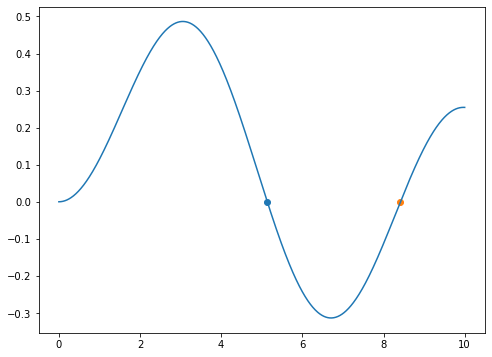

In [3]:
fig = plt.figure(figsize=(8,6))
plt.plot(r,J_l)
for i in range(len(B_nl)):
    plt.scatter(B_nl[i],0)

In [4]:
a = 5 #[Ángstrom]
    
E_nl=[] # Lista que contiene los valores de la eneergia para las n raices y l grado de la funcion de Besell
for i in range(len(B_nl)):
    E = (1/a**2)*(B_nl[i])**2
    E_nl.append(E)

s_nl=[] #lista que contiene los valores de "s"  
for i in range(len(B_nl)):
    s = B_nl[i]/a
    s_nl.append(s)
    
D_nl= [] # lista que contiene los valores de la constante de normalizacion
for i in range(len(s_nl)):
    i_t = integrate.quad(lambda r: sp.jv(l, s_nl[i]*r)**2*r**2, 0, np.inf) 
    D = 1/i_t[0]
    D_nl.append(D)

R_nl = [] # lista de las runcniones radiales 
for i in range(len(s_nl)):
    r = np.linspace(0,10,1000)
    R = D_nl[i]*sp.jv(l, s_nl[i]*r)
    R_nl.append(R)

<ipython-input-4-7c11b6242139>:15: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  i_t = integrate.quad(lambda r: sp.jv(l, s_nl[i]*r)**2*r**2, 0, np.inf)
<ipython-input-4-7c11b6242139>:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  i_t = integrate.quad(lambda r: sp.jv(l, s_nl[i]*r)**2*r**2, 0, np.inf)


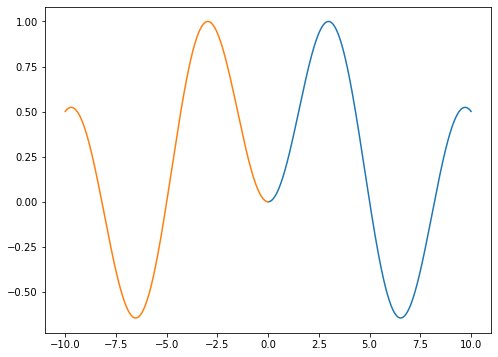

In [5]:

plt.figure(figsize=(8,6))
r = np.linspace(0,10,1000)
plt.plot(r,R_nl[0]/np.max(R_nl[0]))
plt.plot(-np.flip(r),np.flip(R_nl[0]/np.max(R_nl[0])))

#for i in range(0, len(n)):
#    plt.plot(x,[E_nl[i] for x in range(0,len(x))], color = 'k')